In [600]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [601]:
test_df = pd.read_csv("test.csv")

### Keşifçi Veri Analizi

In [602]:
raw_data = pd.read_csv("train.csv")
df = raw_data.copy()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

--SalePrice - mülkün dolar cinsinden satış fiyatı. Bu, tahmin etmeye çalıştığınız hedef değişkendir.<br>
--MSSubClass: Bina sınıfı<br>
--MSZoning: Genel imar sınıflandırması<br>
--LotFrontage: Mülke bağlı caddenin doğrusal ayakları<br>
--LotArea: Metrekare cinsinden parti büyüklüğü<br>
--Street: Yol erişim türü<br>
--Alley: Sokak erişim türü<br>
--LotShape: Mülkün genel şekli<br>
--LandContour: Mülkün düzlüğü<br>
--Utilities: Kullanılabilir yardımcı program türleri<br>
--LotConfig: Lot konfigürasyonu<br>
--LandSlope: Mülkün eğimi<br>
--Neighborhood: Ames şehir sınırları içindeki fiziksel konumlar<br>
--Koşul1: Ana yola veya demiryoluna yakınlık<br>
--Koşul2: Ana yola veya demiryoluna yakınlık (bir saniye varsa)<br>
--BldgType: Konut tipi<br>
--HouseStyle: Konut tarzı<br>
--OverallQual: Genel malzeme ve bitiş kalitesi<br>
--OverallCond: Genel durum değerlendirmesi<br>
--YearBuilt: Orijinal yapım tarihi<br>
--YearRemodAdd: Tadilat tarihi<br>
--RoofStyle: Çatı tipi<br>
--RoofMatl: Çatı malzemesi<br>
--Exterior1st: Evin dış kaplaması<br>
--Exterior2nd: Evin dış cephe kaplaması (birden fazla malzeme varsa)<br>
--MasVnrType: Duvar kaplama tipi<br>
--MasVnrArea: Metrekare cinsinden duvar kaplama alanı<br>
--ExterQual: Dış malzeme kalitesi<br>
--ExterCond: Malzemenin dış cephedeki mevcut durumu<br>
--Foundation: Vakıf türü<br>
--BsmtQual: Bodrumun yüksekliği<br>
--BsmtCond: Bodrum katının genel durumu<br>
--BsmtExposure: Dışarı çıkma veya bahçe seviyesi bodrum duvarları<br>
--BsmtFinType1: Bodrum bitmiş alanın kalitesi<br>
--BsmtFinSF1: Tip 1 bitmiş fit kare<br>
--BsmtFinType2: İkinci bitmiş alanın kalitesi (varsa)<br>
--BsmtFinSF2: Tip 2 bitmiş fit kare<br>
--BsmtUnfSF: Bitmemiş metrekarelik bodrum alanı<br>
--TotalBsmtSF: Bodrum alanının toplam metrekaresi<br>
--Heating: Isıtma türü<br>
--HeatingQC: Isıtma kalitesi ve durumu<br>
--CentralAir: Merkezi klima<br>
--Electrical: Elektrik sistemi<br>
--1stFlrSF: Birinci Kat metrekare<br>
--2ndFlrSF: İkinci kat metrekare<br>
--LowQualFinSF: Düşük kaliteli bitmiş fit kare (tüm katlar)<br>
--GrLivArea: Metrekare üstü (zemin) yaşam alanı<br>
--BsmtFullBath: Bodrum katı banyoları<br>
--BsmtHalfBath: Bodrum yarım banyoları<br>
--FullBath: Sınıfın üzerinde tam banyolar<br>
--HalfBath: Sınıfın üzerinde yarım banyolar<br>
--Bedroom: Bodrum katın üzerindeki yatak odası sayısı<br>
--Kitchen: Mutfak sayısı<br>
--KitchenQual: Mutfak kalitesi<br>
--TotRmsAbvGrd: Sınıfın üzerindeki toplam oda sayısı (banyo dahil değildir)<br>
--İşlevsel: Ev işlevsellik derecesi<br>
--Şömineler: Şömine sayısı<br>
--FireplaceQu: Şömine kalitesi<br>
--Garaj Türü: Garaj konumu<br>
--GarageYrBlt: Garajın yapıldığı yıl<br>
--GarageFinish: Garajın iç kaplaması<br>
--GarageCars: Garajın araç kapasitesi cinsinden boyutu<br>
--GarageArea: Garajın metrekare cinsinden boyutu<br>
--GarageQual: Garaj kalitesi<br>
--GarageCond: Garaj durumu<br>
--PavedDrive: Asfaltlanmış araba yolu<br>
--WoodDeckSF: Metrekare cinsinden ahşap güverte alanı<br>
--OpenPorchSF: Metrekare cinsinden açık sundurma alanı<br>
--EnclosedPorch: Metrekare cinsinden kapalı sundurma alanı<br>
--3SsnPorch: Metrekare cinsinden üç mevsimlik sundurma alanı<br>
--ScreenPorch: Metrekare cinsinden ekran sundurma alanı<br>
--PoolArea: Metrekare cinsinden havuz alanı<br>
--PoolQC: Havuz kalitesi<br>
--Çit: Çit kalitesi<br>
--MiscFeature: Diğer kategorilerde kapsanmayan çeşitli özellik<br>
--MiscVal: Çeşitli özelliğin Dolar Değeri<br>
--MoSold: Satıldığı ay<br>
--Satılan Yıl: Satılan Yıl<br>
--Satış Türü: Satış türü<br>
--SatışDurum: Satış durumu<br>

#### NA Durumlar için notlar
--Alley : İlgili dairenin sokak erişimi yok.<br>
--BsmtQual : İlgili dairenin bodrum katı yok.<br>
--BsmtCond : İlgili dairenin bodum katı olmadığından bodrum katı değerlendirilemez.<br>
--BsmtExposure : İlgili dairenin bodum katı olmadığından bahçe seviyesi duvarları da yok.<br>
--BsmtFinType1 : Bodrum katı olmadığından değerlendirilemez<br>
--BsmtFinType2 : Bodrum katı olmadığından değerlendirilemez<br>
--FireplaceQu : Şömine olmadığından değerlendirilemez<br>
--GarageType : Garaj olmadığında değerlendirilemez<br>
--GarageFinish : Garaj olmadığında değerlendirilemez<br>
--GarageQual : Garaj olmadığında değerlendirilemez<br>
--GarageCond : Garaj olmadığında değerlendirilemez<br>
--PoolQC : Havuz olmadığında değerlendirilemez<br>
--Fence : Çit olmadığında değerlendirilemez<br>
--MiscFeature : Diğer kategorilerde kapsanmayan çeşitli özelliklerden bahsedilmiyorsa NA'dır.<br>

In [604]:
#Sadece object tipindeki kolonların alınması
df_obj = df.select_dtypes(include='object').copy()

In [605]:
df_obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Kategorik verilerin encoding işlemleri

#### MSZoning

In [606]:
df_obj[df_obj.MSZoning.isnull() == True]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition


In [607]:
df_obj.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

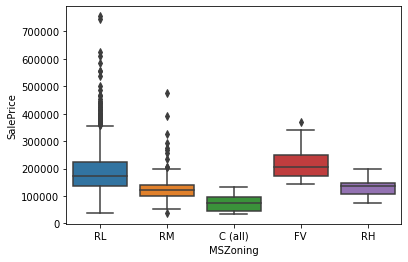

In [608]:
sns.boxplot(x="MSZoning", y="SalePrice", data=df)
plt.show()

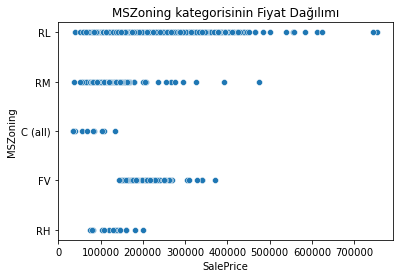

In [609]:
sns.scatterplot(x='SalePrice', y='MSZoning', data=df, palette='rocket')
plt.title('MSZoning kategorisinin Fiyat Dağılımı')
plt.show()

In [610]:
dictionary = {"MSZoning":{"C (all)":1,"RH":2, "FV":3, "RM":4, "RL":5}}
df_obj = df_obj.replace(dictionary)

#### Street

In [611]:
df_obj.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [612]:
df_obj.Street.isnull().sum()

0

In [613]:
dictionary = {"Street":{"Grvl":1,"Pave":2}}
df_obj = df_obj.replace(dictionary)

#### Alley

In [614]:
df_obj.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [615]:
df_obj.Alley.isnull().sum()

1369

Alleys can lead to a better integration of automobile and foot traffic in a neighborhood which creates improved access and walkability. https://www.canr.msu.edu › news › an_argument_for_alleys <br>
Açıklamadan  hareketle aşağıdaki sıralama yapıldı.

In [616]:
df_obj.Alley.fillna(0)
dictionary = {"Alley":{"Grvl":1,"Pave":2}}
df_obj = df_obj.replace(dictionary)

In [617]:
df_obj.Alley.isnull().sum()

1369

In [618]:
df_obj.Alley.fillna(0, inplace=True)

In [619]:
df_obj.Alley.value_counts()

0.0    1369
1.0      50
2.0      41
Name: Alley, dtype: int64

#### LotShape

In [620]:
df_obj.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [621]:
df_obj.LotShape.isnull().sum()

0

The beneficial shapes are square and rectangle (with proper ratio). These plot shapes lead to prosperity, wellbeing and happiness for the owner. Other shapes, such as circle, U or L-shaped plots have missing corners that may cause serious problems, depending on the section that is missing. housing.com <br><br>
Açıklamaya göre aşağıdaki sıralama yapıldı

In [622]:
dictionary = {"LotShape":{"IR3":0,"IR2":1, "IR1":2, "Reg":3}}
df_obj = df_obj.replace(dictionary)

#### LandContour

In [623]:
df_obj.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [624]:
df_obj.LandContour.isnull().sum()

0

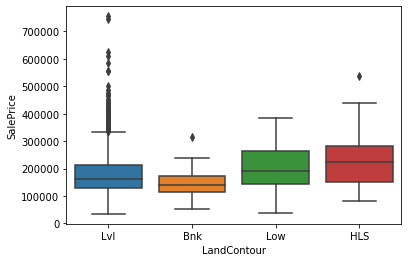

In [625]:
sns.boxplot(x="LandContour", y="SalePrice", data=df)
plt.show()

In [626]:
dictionary = {"LandContour":{"Bnk":0,"Low":1, "HLS":2, "Lvl":3}}
df_obj = df_obj.replace(dictionary)

#### Utilities

In [627]:
df_obj.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [628]:
df_obj.Utilities.isnull().sum()

0

In [629]:
dictionary = {"Utilities":{"NoSeWa":0,"AllPub":1}}
df_obj = df_obj.replace(dictionary)

#### LotConfig

In [630]:
df_obj.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [631]:
df_obj.LotConfig.isnull().sum()

0

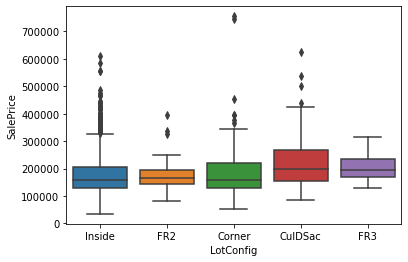

In [632]:
sns.boxplot(y="SalePrice", x="LotConfig", data=df)
plt.show()

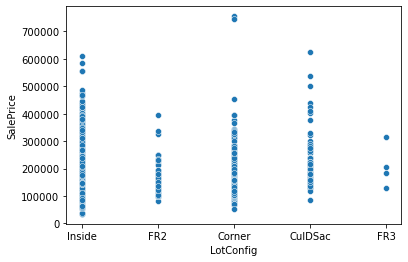

In [633]:
sns.scatterplot(y="SalePrice", x="LotConfig", data=df)
plt.show()

In [634]:
dictionary = {"LotConfig":{"FR2":0,"Inside":1, "FR3":2, "Corner":3, "CulDSac":4}}
df_obj = df_obj.replace(dictionary)

#### LandSlope

In [635]:
df_obj.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [636]:
df_obj.LandSlope.isnull().sum()

0

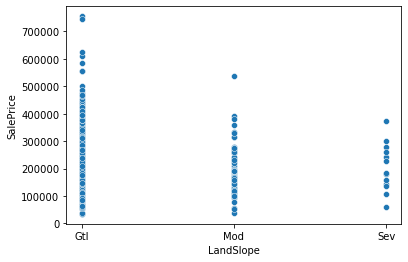

In [637]:
sns.scatterplot(y="SalePrice", x="LandSlope", data=df)
plt.show()

In [638]:
dictionary = {"LandSlope":{"Sev":0,"Mod":1, "Gtl":2}}
df_obj = df_obj.replace(dictionary)

#### Neighborhood

In [639]:
df_obj.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

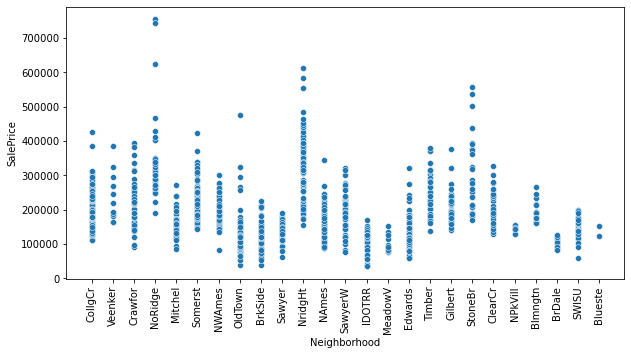

In [640]:
plt.figure(figsize = (10,5))
sns.scatterplot(y="SalePrice", x="Neighborhood", data=df)
plt.xticks(rotation=90)
plt.show()

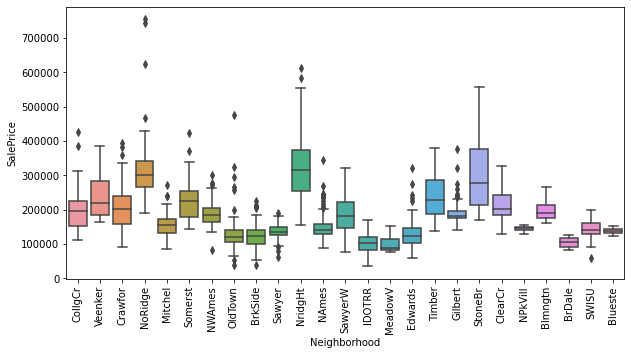

In [641]:
plt.figure(figsize = (10,5))
sns.boxplot(y="SalePrice", x="Neighborhood", data=df)
plt.xticks(rotation=90)
plt.show()

In [642]:
df_obj.Neighborhood.isnull().sum()

0

In [643]:
grouped = df.groupby('Neighborhood')
grouped['SalePrice'].agg([np.min, np.mean, np.std, np.max]).sort_values(by="mean",ascending=False)

,amin,mean,std,amax
Neighborhood,,,,
NoRidge,190000,335295.317073,121412.658640,755000
NridgHt,154000,316270.623377,96392.544954,611657
StoneBr,170000,310499.000000,112969.676640,556581
Timber,137500,242247.447368,64845.651549,378500
Veenker,162500,238772.727273,72369.317959,385000
Somerst,144152,225379.837209,56177.555888,423000
ClearCr,130000,212565.428571,50231.538993,328000
Crawfor,90350,210624.725490,68866.395472,392500
CollgCr,110000,197965.773333,51403.666438,424870


In [644]:
#Ortalamalarına göre kategorilendirildi
categories=pd.Categorical(df_obj['Neighborhood'],
                          categories=['MeadowV','IDOTRR','BrDale','BrkSide','Edwards','OldTown',
                                     'Sawyer','Blueste','SWISU','NPkVill','NAmes','Mitchel','SawyerW','NWAmes',
                                     'Gilbert','Blmngtn','CollgCr','Crawfor','ClearCr','Somerst','Veenker',
                                     'Timber','StoneBr','NridgHt','NoRidge'],ordered=True)
print(categories)

['CollgCr', 'Veenker', 'CollgCr', 'Crawfor', 'NoRidge', ..., 'Gilbert', 'NWAmes', 'Crawfor', 'NAmes', 'Edwards']
Length: 1460
Categories (25, object): ['MeadowV' < 'IDOTRR' < 'BrDale' < 'BrkSide' ... 'Timber' < 'StoneBr' < 'NridgHt' < 'NoRidge']


In [645]:
Neighborhood,unique=pd.factorize(categories,sort=True)
df_obj['Neighborhood']=Neighborhood
df_obj['Neighborhood']

0       16
1       20
2       16
3       17
4       24
        ..
1455    14
1456    13
1457    17
1458    10
1459     4
Name: Neighborhood, Length: 1460, dtype: int64

#### Condition1 & Condition2

In [646]:
df_obj = df_obj.astype({'Alley': 'int64'})

In [647]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   int64 
 1   Street         1460 non-null   int64 
 2   Alley          1460 non-null   int64 
 3   LotShape       1460 non-null   int64 
 4   LandContour    1460 non-null   int64 
 5   Utilities      1460 non-null   int64 
 6   LotConfig      1460 non-null   int64 
 7   LandSlope      1460 non-null   int64 
 8   Neighborhood   1460 non-null   int64 
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [648]:
df_obj.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [649]:
df_obj.Condition1.isnull().sum()

0

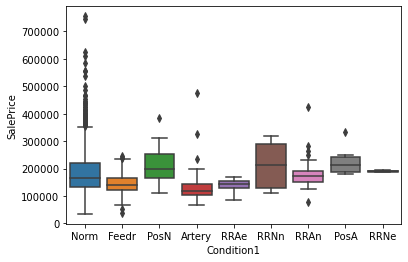

In [650]:
sns.boxplot(x="Condition1", y="SalePrice", data=df)
plt.show()

In [651]:
grouped = df.groupby('Condition1')
grouped['SalePrice'].agg([np.min, np.mean, np.std, np.max]).sort_values(by="mean",ascending=False)

,amin,mean,std,amax
Condition1,,,,
PosA,180000,225875.000000,52348.932313,335000
PosN,109500,215184.210526,65256.536609,385000
RRNn,110000,212400.000000,93823.238060,320000
RRNe,187000,190750.000000,5303.300859,194500
Norm,34900,184495.492063,81256.980125,755000
RRAn,79500,184396.615385,66177.922070,423000
Feedr,40000,142475.481481,42157.290117,244600
RRAe,87000,138400.000000,24030.813553,171000
Artery,66500,135091.666667,66226.660548,475000


In [652]:
categories=pd.Categorical(df_obj['Condition1'],
                          categories=['Artery','RRAe','Feedr','RRAn','Norm','RRNe',
                                     'RRNn','PosN','PosA'],ordered=True)
print(categories)
Condition1,unique=pd.factorize(categories,sort=True)
df_obj['Condition1']=Condition1
df_obj['Condition1']

['Norm', 'Feedr', 'Norm', 'Norm', 'Norm', ..., 'Norm', 'Norm', 'Norm', 'Norm', 'Norm']
Length: 1460
Categories (9, object): ['Artery' < 'RRAe' < 'Feedr' < 'RRAn' ... 'RRNe' < 'RRNn' < 'PosN' < 'PosA']


0       4
1       2
2       4
3       4
4       4
       ..
1455    4
1456    4
1457    4
1458    4
1459    4
Name: Condition1, Length: 1460, dtype: int64

In [653]:
categories=pd.Categorical(df_obj['Condition2'],
                          categories=['Artery','RRAe','Feedr','RRAn','Norm','RRNe',
                                     'RRNn','PosN','PosA'],ordered=True)
print(categories)
Condition2,unique=pd.factorize(categories,sort=True)
df_obj['Condition2']=Condition2
df_obj['Condition2']

['Norm', 'Norm', 'Norm', 'Norm', 'Norm', ..., 'Norm', 'Norm', 'Norm', 'Norm', 'Norm']
Length: 1460
Categories (9, object): ['Artery' < 'RRAe' < 'Feedr' < 'RRAn' ... 'RRNe' < 'RRNn' < 'PosN' < 'PosA']


0       4
1       4
2       4
3       4
4       4
       ..
1455    4
1456    4
1457    4
1458    4
1459    4
Name: Condition2, Length: 1460, dtype: int64

#### BldgType & HouseStyle
BldgType için OneHot Encoding yapmak istediğimden şimdilik bırakıyorum

In [654]:
df_obj.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [655]:
df_obj.BldgType.isnull().sum()

0

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

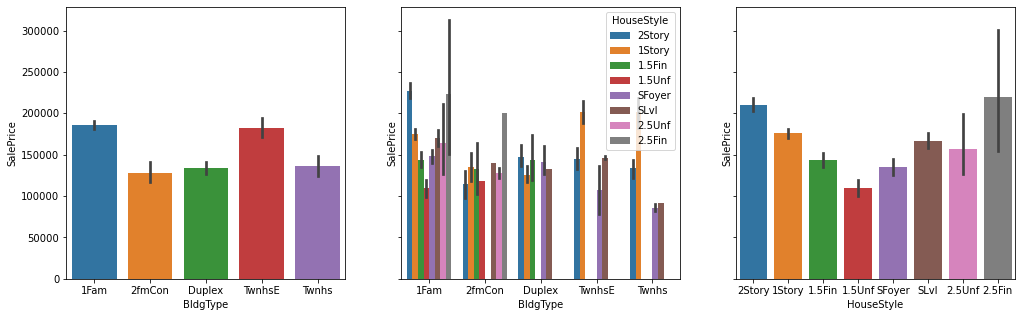

In [656]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharey=True)

sns.barplot(x="BldgType", y="SalePrice",data=df,ax=axes[0])
sns.barplot(x="BldgType", y="SalePrice", hue="HouseStyle",data=df, ax=axes[1])
sns.barplot(x="HouseStyle", y="SalePrice",data=df, ax=axes[2])

In [657]:
grouped = df.groupby("HouseStyle")
grouped['SalePrice'].agg([np.min, np.mean, np.std, np.max]).sort_values(by="mean",ascending=False)

,amin,mean,std,amax
HouseStyle,,,,
2.5Fin,104000,220000.000000,118211.976671,475000
2Story,40000,210051.764045,87339.213570,755000
1Story,34900,175985.477961,77055.715011,611657
SLvl,91000,166703.384615,38305.161339,345000
2.5Unf,101000,157354.545455,63934.128032,325000
1.5Fin,37900,143116.740260,54277.941119,410000
SFoyer,75500,135074.486486,30480.898192,206300
1.5Unf,76000,110150.000000,19036.473090,139400


<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

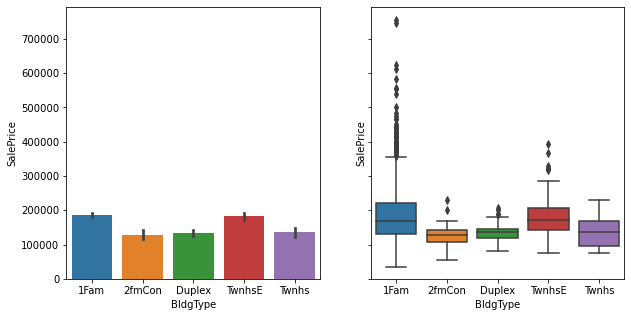

In [658]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(x="BldgType", y="SalePrice",data=df,ax=axes[0])
sns.boxplot(x="BldgType", y="SalePrice",data=df,ax=axes[1])

In [659]:
dictionary = {"HouseStyle":{"1.5Unf":0,"SFoyer":1, "1.5Fin":2, "2.5Unf":3, "SLvl":4,
                           "1Story":5,"2Story":6,"2.5Fin":7}}
df_obj = df_obj.replace(dictionary)

In [660]:
df_obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,5,2,0,3,3,1,1,2,16,4,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,5,2,0,3,3,1,0,2,20,2,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,5,2,0,2,3,1,1,2,16,4,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,5,2,0,2,3,1,3,2,17,4,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,5,2,0,2,3,1,0,2,24,4,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,2,0,3,3,1,1,2,14,4,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,5,2,0,3,3,1,1,2,13,4,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,5,2,0,3,3,1,1,2,17,4,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,5,2,0,3,3,1,1,2,10,4,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [661]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   int64 
 1   Street         1460 non-null   int64 
 2   Alley          1460 non-null   int64 
 3   LotShape       1460 non-null   int64 
 4   LandContour    1460 non-null   int64 
 5   Utilities      1460 non-null   int64 
 6   LotConfig      1460 non-null   int64 
 7   LandSlope      1460 non-null   int64 
 8   Neighborhood   1460 non-null   int64 
 9   Condition1     1460 non-null   int64 
 10  Condition2     1460 non-null   int64 
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

#### RoofStyle & RoofMatl
RoofStyle belki one hot encoding yaparım diye dokunmadım

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'CompShg'),
  Text(1, 0, 'WdShngl'),
  Text(2, 0, 'Metal'),
  Text(3, 0, 'WdShake'),
  Text(4, 0, 'Membran'),
  Text(5, 0, 'Tar&Grv'),
  Text(6, 0, 'Roll'),
  Text(7, 0, 'ClyTile')])

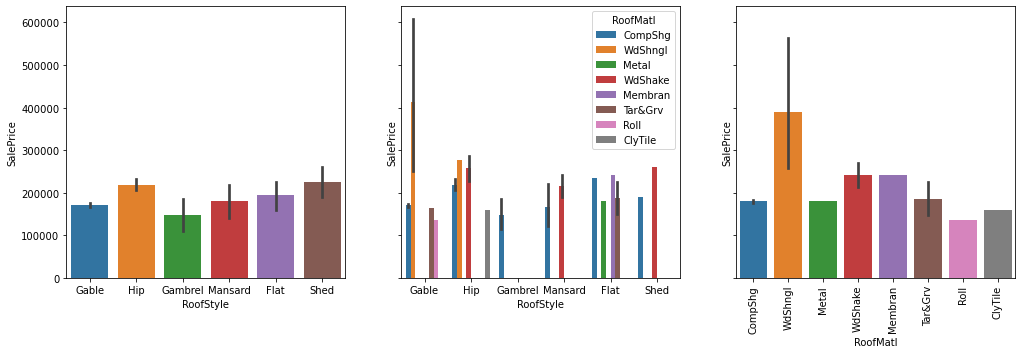

In [662]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharey=True)

sns.barplot(x="RoofStyle", y="SalePrice",data=df,ax=axes[0])
sns.barplot(x="RoofStyle", y="SalePrice", hue="RoofMatl",data=df, ax=axes[1])
sns.barplot(x="RoofMatl", y="SalePrice",data=df, ax=axes[2])
plt.xticks(rotation=90)
#sns.boxplot(x="RoofStyle", y="SalePrice",hue="RoofMatl",data=df, ax=axes[3])

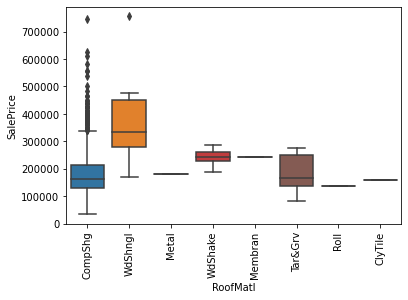

In [663]:
#sns.boxplot(x="RoofStyle", y="SalePrice",hue="RoofMatl",data=df)
sns.boxplot(x="RoofMatl", y="SalePrice",data=df)
plt.xticks(rotation=90)
plt.show()

In [664]:
#WdShngl deki aykırı veri grafiğini çok etkiliyor mu acaba düşüncesiyle o veriyi çıkartıp tekrar denedim
temp_df = df.drop(691).copy()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'CompShg'),
  Text(1, 0, 'WdShngl'),
  Text(2, 0, 'Metal'),
  Text(3, 0, 'WdShake'),
  Text(4, 0, 'Membran'),
  Text(5, 0, 'Tar&Grv'),
  Text(6, 0, 'Roll'),
  Text(7, 0, 'ClyTile')])

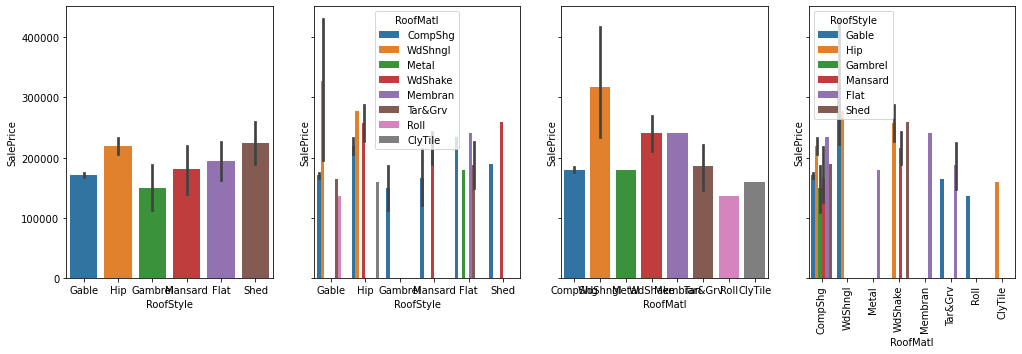

In [665]:
fig, axes = plt.subplots(1, 4, figsize=(17, 5), sharey=True)

sns.barplot(x="RoofStyle", y="SalePrice",data=temp_df,ax=axes[0])
sns.barplot(x="RoofStyle", y="SalePrice", hue="RoofMatl",data=temp_df, ax=axes[1])
sns.barplot(x="RoofMatl", y="SalePrice",data=temp_df, ax=axes[2])
plt.xticks(rotation=90)
sns.barplot(x="RoofMatl", y="SalePrice", hue="RoofStyle",data=temp_df, ax=axes[3])
plt.xticks(rotation=90)

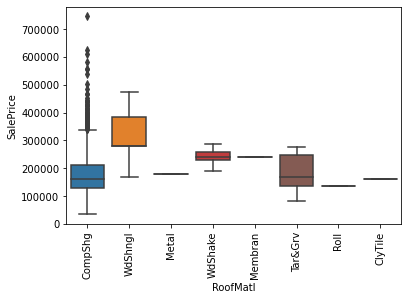

In [666]:
sns.boxplot(x="RoofMatl", y="SalePrice",data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [667]:
temp_df[(temp_df.RoofMatl=='WdShngl') & (temp_df.SalePrice>600000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

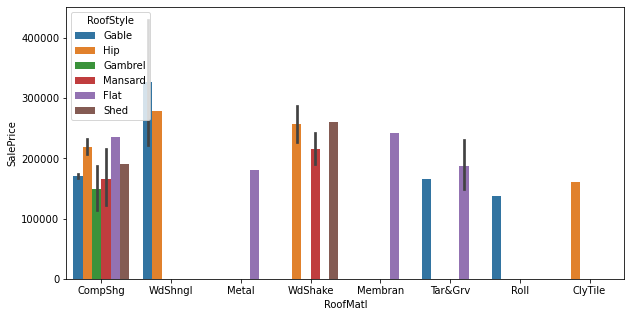

In [668]:
plt.figure(figsize=(10,5))
sns.barplot(x="RoofMatl", y="SalePrice", hue="RoofStyle",data=temp_df)

Is rolled roofing as good as shingles?<br>
Rolled MSR roofing is thinner, larger, cheaper, less durable, and is horizontally installed in long strips. Besides being thicker, composite shingles or any type of shingle are far less prone to tearing or cracking because stress is distributed across a wide area of individually moving parts.
https://www.thespruce.com › Exterior Remodel › Roof<br><br>

Shingle type----Warranty------Cost<br>
Asphalt(tar&grv)15-50 years...5 dollar per square foot (on average)<br>
Composite.........30-50 years....10 dollar per square foot (on average)<br>
https://roofingcalculator.com/news/

In [669]:
dictionary = {"RoofMatl":{"Roll":1, "ClyTile":2, "Membran":3, "Metal":4,
                           "CompShg":5,"Tar&Grv":6,"WdShake":7,"WdShngl":8}}
df_obj = df_obj.replace(dictionary)

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

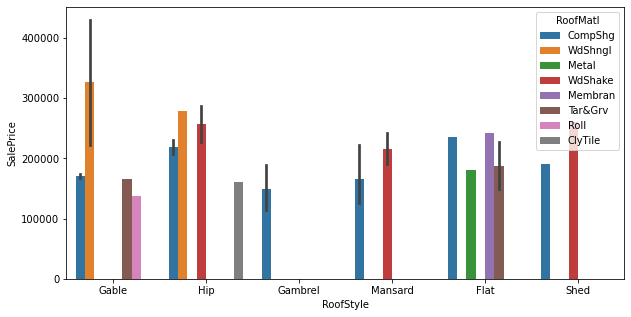

In [670]:
plt.figure(figsize=(10,5))
sns.barplot(x="RoofStyle", y="SalePrice", hue="RoofMatl",data=temp_df)

#### Exterior1st & Exterior2nd
Bu değerlerin one hot yapılmasına karar verildi

In [671]:
df_obj.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [672]:
df_obj.Exterior1st.isnull().sum()

0

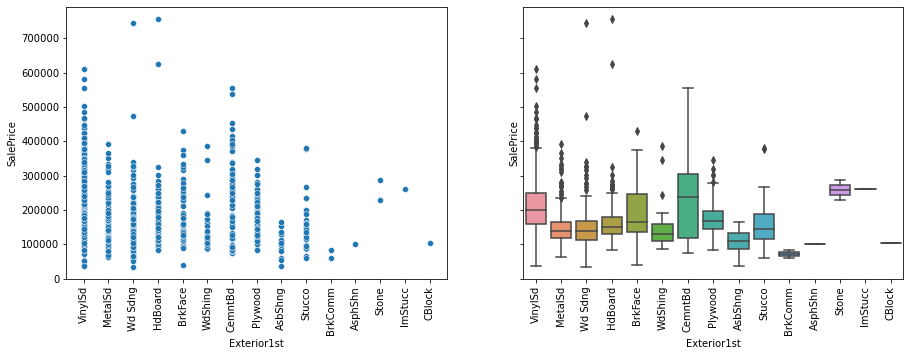

In [673]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.scatterplot(x="Exterior1st", y="SalePrice",data=df,ax=axes[0])
sns.boxplot(x="Exterior1st", y="SalePrice",data=df, ax=axes[1])
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
plt.show()

VinylSd:Polyvinyl chloride (PVC),  It's one of the lowest cost options for exterior wall siding<br>
Wood siding typically costs around 5 to 10 dollar per square foot installed.<br>
Typically, brick siding costs around 6 to 15 dollar or more per square foot installed.<br>
Fiber-cement siding The average cost is 6 to 12 per square foot installed (cost higher with trim) <br>
The average cost of stone is around 10 to 30 per square foot installed, and if maintained properly, can last the lifetime of house.<br>

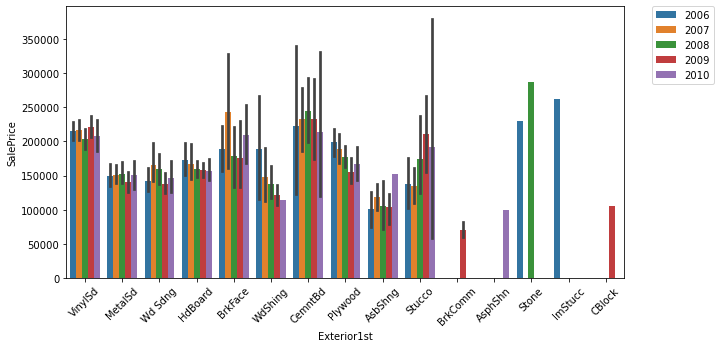

In [674]:
plt.figure(figsize=(10,5))
sns.barplot(x="Exterior1st", y="SalePrice",hue="YrSold",data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

In [675]:
df_obj.Exterior1st.value_counts()  ### https://www.analyticsvidhya.com/blog/2021/05/how-to-perform-one-hot-encoding-for-multi-categorical-variables/

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [676]:
test_df.Exterior1st.value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

#### MasVnrtype

In [677]:
df_obj.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [678]:
df_obj.MasVnrType.isnull().sum()

8

In [679]:
df[df.MasVnrType.isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


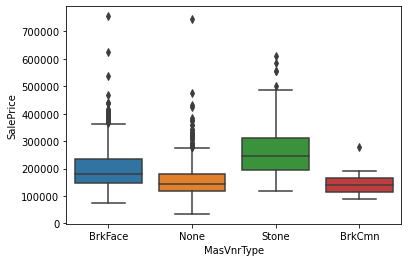

In [680]:
sns.boxplot(x="MasVnrType", y="SalePrice", data=df)
plt.show()

In [681]:
df_obj.MasVnrType.fillna(0, inplace=True)
dictionary = {"MasVnrType":{"None":0,"BrkCmn":1, "BrkFace":2, "Stone":3}}
df_obj = df_obj.replace(dictionary)

#### ExterQual & ExterCond

In [682]:
df_obj.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [683]:
df_obj.ExterQual.isnull().sum()

0

In [684]:
dictionary = {"ExterQual":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
df_obj = df_obj.replace(dictionary)

In [685]:
df_obj.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [686]:
dictionary = {"ExterCond":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
df_obj = df_obj.replace(dictionary)

#### Foundation

In [687]:
df_obj.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [688]:
df_obj.Foundation.isnull().sum()

0

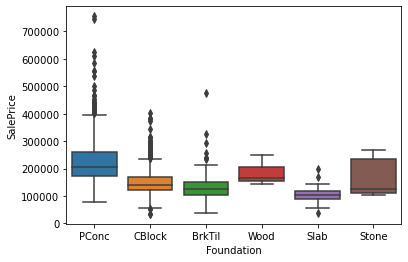

In [689]:
sns.boxplot(x="Foundation", y="SalePrice", data=df)
plt.show()

In [690]:
dictionary = {"Foundation":{"Slab":1,"BrkTil":2, "CBlock":3, "Wood":4, "PConc":5, "Stone":6}}
df_obj = df_obj.replace(dictionary)

Cinder blocks had many uses in the construction industry until about 50 years ago when poured concrete wall construction became more common.<br>

Poured concrete wall foundations are arguably stronger than cinder blocks. Poured walls have a better lateral strength, which means they are able to resist more pressure from the water and the soil from the outside. A poured wall doesn't have joints like a block wall so it is easier to waterproof.<br>

Natural stone is by far the most durable. Bricks and concrete both deteriorate with water penetration; bricks cannot be placed below grade and are usually hollow on the inside; concrete always pits and cracks and is hard to repair. Stone, on the other hand, will almost never experience these problems.<br>

Unlike concrete, treated wood doesn't absorb moisture, rather it wicks away. Concrete contains moisture in it's makeup and easily absorbs moisture from it's surroundings. In heavy rains and harsh conditions, wood is quicker to dry than concrete.

In [691]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   int64 
 1   Street         1460 non-null   int64 
 2   Alley          1460 non-null   int64 
 3   LotShape       1460 non-null   int64 
 4   LandContour    1460 non-null   int64 
 5   Utilities      1460 non-null   int64 
 6   LotConfig      1460 non-null   int64 
 7   LandSlope      1460 non-null   int64 
 8   Neighborhood   1460 non-null   int64 
 9   Condition1     1460 non-null   int64 
 10  Condition2     1460 non-null   int64 
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   int64 
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   int64 
 18  ExterQual      1460 non-null

#### BsmtQual & BsmtCond & BsmtExposure & BsmtFinType1 & BsmtFinType2

In [692]:
df_obj.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [693]:
df_obj.BsmtQual.isnull().sum()

37

In [694]:
df_obj.BsmtQual.fillna(0, inplace=True)
dictionary = {"BsmtQual":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
df_obj = df_obj.replace(dictionary)

In [695]:
df_obj.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [696]:
df_obj.BsmtCond.isnull().sum()

37

In [697]:
df_obj.BsmtCond.fillna(0, inplace=True)
dictionary = {"BsmtCond":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
df_obj = df_obj.replace(dictionary)

In [698]:
df_obj.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [699]:
df_obj.BsmtExposure.isnull().sum()

38

In [700]:
df_obj.BsmtExposure.fillna(0, inplace=True)
dictionary = {"BsmtExposure":{"No":1,"Mn":2, "Av":3, "Gd":4}}
df_obj = df_obj.replace(dictionary)

In [701]:
df_obj.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [702]:
df_obj.BsmtFinType1.isnull().sum()

37

In [703]:
df_obj.BsmtFinType1.fillna(0, inplace=True)
dictionary = {"BsmtFinType1":{"Unf":1,"LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}}
df_obj = df_obj.replace(dictionary)

In [704]:
df_obj.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [705]:
df_obj.BsmtFinType2.isnull().sum()

38

In [706]:
df_obj.BsmtFinType2.fillna(0, inplace=True)
dictionary = {"BsmtFinType2":{"Unf":1,"LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}}
df_obj = df_obj.replace(dictionary)

In [707]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   int64 
 1   Street         1460 non-null   int64 
 2   Alley          1460 non-null   int64 
 3   LotShape       1460 non-null   int64 
 4   LandContour    1460 non-null   int64 
 5   Utilities      1460 non-null   int64 
 6   LotConfig      1460 non-null   int64 
 7   LandSlope      1460 non-null   int64 
 8   Neighborhood   1460 non-null   int64 
 9   Condition1     1460 non-null   int64 
 10  Condition2     1460 non-null   int64 
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   int64 
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   int64 
 18  ExterQual      1460 non-null

#### Heating & HeatingQC

In [708]:
df_obj.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [709]:
df_obj.Heating.isnull().sum()

0

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

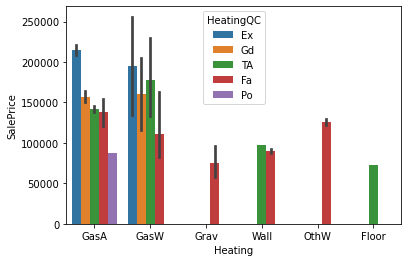

In [710]:
sns.barplot(x="Heating", y="SalePrice", hue="HeatingQC", data=df)

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

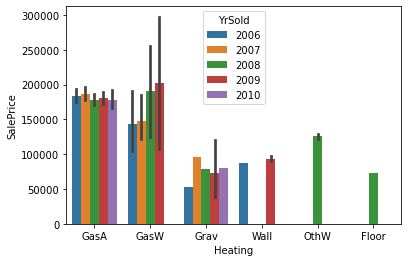

In [711]:
sns.barplot(x="Heating", y="SalePrice", hue="YrSold", data=df)

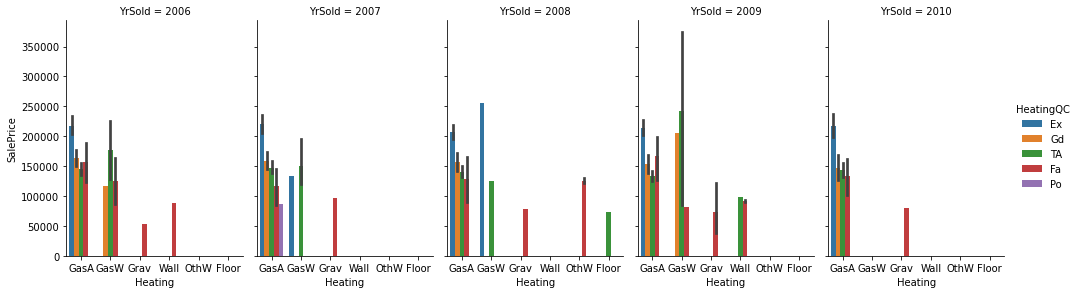

In [712]:
g = sns.catplot(x="Heating", y="SalePrice",
                hue="HeatingQC", col="YrSold",
                data=df, kind="bar",
                height=4, aspect=.7);

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

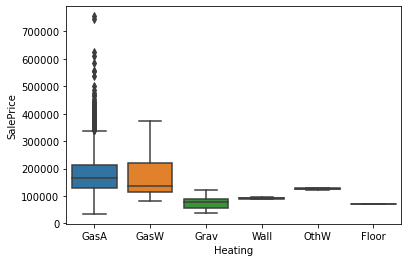

In [713]:
sns.boxplot(x="Heating", y="SalePrice", data=df)

The average cost for furnace replacement or installation ranges from 2,500 to 7,150 dollar <br>
The average cost for a steam boiler is about 3,500 dollar. A higher end steam boiler installation could cost up to 8,000 dollar. https://modernize.com/hvac/heating-repair-installation/boiler/steam

In [714]:
dictionary = {"Heating":{"Grav":1,"Floor":2, "Wall":3, "OthW":4, "GasA":5, "GasW":6}}
df_obj = df_obj.replace(dictionary)

In [715]:
df_obj.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [716]:
df_obj.HeatingQC.isnull().sum()

0

In [717]:
dictionary = {"HeatingQC":{"Po":1,"Fa":2, "TA":3, "Gd":4, "Ex":5}}
df_obj = df_obj.replace(dictionary)

#### CentralAir

In [718]:
df_obj.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [719]:
df_obj.CentralAir.isnull().sum()

0

In [720]:
dictionary = {"CentralAir":{"N":0,"Y":1}}
df_obj = df_obj.replace(dictionary)

#### Electrical

In [721]:
df_obj.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [722]:
df_obj.Electrical.isnull().sum()

1

In [723]:
df[(df.Electrical.isnull()==True)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

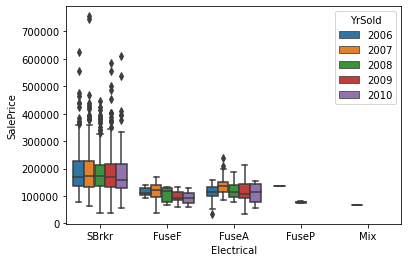

In [724]:
sns.boxplot(x="Electrical", y="SalePrice", hue="YrSold",data=df)

In [725]:
df_obj.Electrical.fillna(3, inplace=True)
dictionary = {"Electrical":{"Mix":1,"FuseP":2,"FuseF":3, "FuseA":4, "SBrkr":5}}
df_obj = df_obj.replace(dictionary)

#### KitchenQual

In [726]:
df_obj.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [727]:
df_obj.KitchenQual.isnull().sum()

0

In [728]:
dictionary = {"KitchenQual":{"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}}
df_obj = df_obj.replace(dictionary)

#### Functional

In [729]:
df_obj.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [730]:
df_obj.Functional.isnull().sum()

0

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

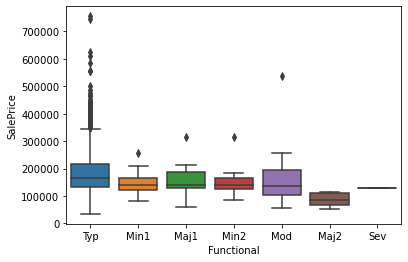

In [731]:
sns.boxplot(x="Functional", y="SalePrice", data=df)

In [732]:
dictionary = {"Functional":{"Sev":1,"Maj2":2,"Maj1":3, "Mod":4, "Min1":5, "Min2":6, "Typ":7}}
df_obj = df_obj.replace(dictionary)

#### FireplaceQu

In [733]:
df_obj.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [734]:
df_obj.FireplaceQu.isnull().sum()

690

In [735]:
df_obj.FireplaceQu.fillna(0, inplace=True)
dictionary = {"FireplaceQu":{"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}}
df_obj = df_obj.replace(dictionary)

In [736]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   int64 
 1   Street         1460 non-null   int64 
 2   Alley          1460 non-null   int64 
 3   LotShape       1460 non-null   int64 
 4   LandContour    1460 non-null   int64 
 5   Utilities      1460 non-null   int64 
 6   LotConfig      1460 non-null   int64 
 7   LandSlope      1460 non-null   int64 
 8   Neighborhood   1460 non-null   int64 
 9   Condition1     1460 non-null   int64 
 10  Condition2     1460 non-null   int64 
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   int64 
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   int64 
 18  ExterQual      1460 non-null

#### GarageType & GarageFinish & GarageQual & GarageCond

In [737]:
df_obj.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

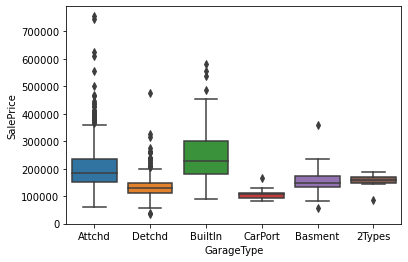

In [738]:
sns.boxplot(x="GarageType", y="SalePrice", data=df)

In [739]:
grouped = df.groupby("GarageType")
grouped['SalePrice'].agg([np.min, np.mean, np.std, np.max]).sort_values(by="mean",ascending=False)

,amin,mean,std,amax
GarageType,,,,
BuiltIn,91000,254751.738636,102230.854394,582933
Attchd,60000,202892.656322,77146.621778,755000
Basment,55993,160570.684211,63967.283574,359100
2Types,87000,151283.333333,34917.068415,186700
Detchd,35311,134091.162791,41391.549953,475000
CarPort,82000,109962.111111,24638.183681,164900


In [740]:
df_obj.GarageType.fillna(0, inplace=True)
dictionary = {"GarageType":{"CarPort":1,"Detchd":2,"2Types":3, "Basment":4, "Attchd":5, "BuiltIn":6}}
df_obj = df_obj.replace(dictionary)

In [741]:
df_obj.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [742]:
df_obj.GarageFinish.fillna(0, inplace=True)
dictionary = {"GarageFinish":{"Unf":1,"RFn":2,"Fin":3}}
df_obj = df_obj.replace(dictionary)

In [743]:
df_obj.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [744]:
df_obj.GarageQual.fillna(0, inplace=True)
dictionary = {"GarageQual":{"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}}
df_obj = df_obj.replace(dictionary)

In [745]:
df_obj.GarageCond.fillna(0, inplace=True)
dictionary = {"GarageCond":{"Po":1,"Fa":2,"TA":3, "Gd":4, "Ex":5}}
df_obj = df_obj.replace(dictionary)

#### PavedDrive

In [746]:
df_obj.PavedDrive.isnull().sum()

0

In [747]:
df_obj.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

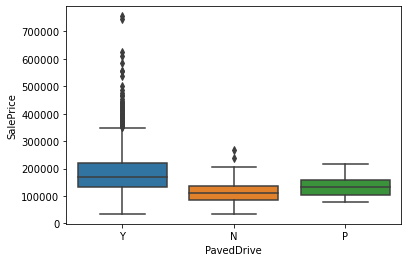

In [748]:
sns.boxplot(x="PavedDrive", y="SalePrice", data=df)

In [749]:
dictionary = {"PavedDrive":{"N":1,"P":2,"Y":3}}
df_obj = df_obj.replace(dictionary)

#### PoolQC

In [750]:
df_obj.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [751]:
df_obj.PoolQC.fillna(0, inplace=True)
dictionary = {"PoolQC":{"Fa":1,"TA":2, "Gd":3, "Ex":4}}
df_obj = df_obj.replace(dictionary)

#### Fence

In [752]:
df_obj.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

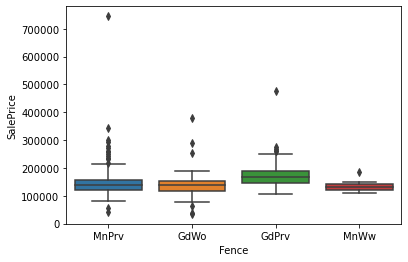

In [753]:
sns.boxplot(x="Fence", y="SalePrice", data=df)

In [754]:
grouped = df.groupby("Fence")
grouped['SalePrice'].agg([np.min, np.mean, np.std, np.max]).sort_values(by="mean",ascending=False)

,amin,mean,std,amax
Fence,,,,
GdPrv,108000,178927.457627,56757.237563,475000
MnPrv,40000,148751.089172,66096.069463,745000
GdWo,34900,140379.314815,53592.585059,381000
MnWw,110000,134286.363636,21781.805376,187000


In [755]:
df_obj.Fence.fillna(0, inplace=True)
dictionary = {"Fence":{"MnWw":1,"GdWo":2, "MnPrv":3, "GdPrv":4}}
df_obj = df_obj.replace(dictionary)

#### MiscFeature

In [756]:
df_obj.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

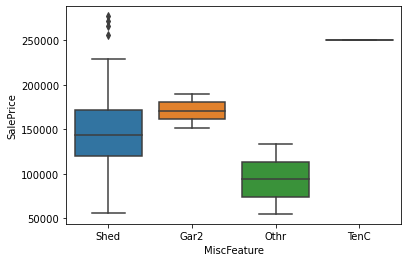

In [757]:
sns.boxplot(x="MiscFeature", y="SalePrice", data=df)

In [758]:
df_obj.MiscFeature.fillna(0, inplace=True)
dictionary = {"MiscFeature":{"Othr":1,"Shed":2, "Gar2":3, "TenC":4}}
df_obj = df_obj.replace(dictionary)

#### Dummy Encoding for SaleType-SaleCondition-BldgType-Exterior1st-Exterior2nd-RoofStyle

In [759]:
df_obj.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [760]:
df_obj.SaleType.isnull().sum()

0

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

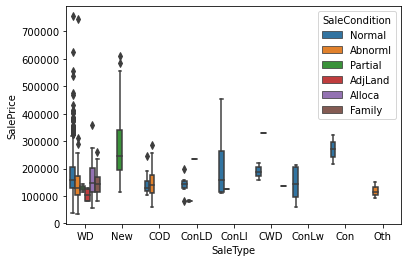

In [761]:
sns.boxplot(x="SaleType", y="SalePrice", hue="SaleCondition", data=df)

In [762]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   int64 
 1   Street         1460 non-null   int64 
 2   Alley          1460 non-null   int64 
 3   LotShape       1460 non-null   int64 
 4   LandContour    1460 non-null   int64 
 5   Utilities      1460 non-null   int64 
 6   LotConfig      1460 non-null   int64 
 7   LandSlope      1460 non-null   int64 
 8   Neighborhood   1460 non-null   int64 
 9   Condition1     1460 non-null   int64 
 10  Condition2     1460 non-null   int64 
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   int64 
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   int64 
 18  ExterQual      1460 non-null

In [763]:
from sklearn.preprocessing import OneHotEncoder

In [764]:
new_df2 = pd.DataFrame()

In [765]:
new_df = pd.read_csv("train.csv", usecols=['BldgType','Exterior1st','Exterior2nd'])

In [766]:
top_10 = [x for x in new_df.BldgType.value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
    new_df2['BldgType_'+label] = np.where(new_df['BldgType']==label,1,0)

In [767]:
new_df2

,BldgType_1Fam,BldgType_TwnhsE,BldgType_Duplex,BldgType_Twnhs,BldgType_2fmCon
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1455,1,0,0,0,0
1456,1,0,0,0,0
1457,1,0,0,0,0
1458,1,0,0,0,0


In [768]:
top_10 = [x for x in new_df.Exterior1st.value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
    new_df2['Exterior1st_'+label] = np.where(new_df['Exterior1st']==label,1,0)

In [769]:
new_df2

,BldgType_1Fam,BldgType_TwnhsE,BldgType_Duplex,BldgType_Twnhs,BldgType_2fmCon,Exterior1st_VinylSd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_Stucco,Exterior1st_AsbShng
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1456,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1457,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1458,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [770]:
top_10 = [x for x in new_df.Exterior2nd.value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
    new_df2['Exterior2nd_'+label] = np.where(new_df['Exterior2nd']==label,1,0)

In [771]:
new_df2

,BldgType_1Fam,BldgType_TwnhsE,BldgType_Duplex,BldgType_Twnhs,BldgType_2fmCon,Exterior1st_VinylSd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_Plywood,...,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_Stucco,Exterior2nd_BrkFace,Exterior2nd_AsbShng
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1456,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1457,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1458,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [772]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   int64 
 1   Street         1460 non-null   int64 
 2   Alley          1460 non-null   int64 
 3   LotShape       1460 non-null   int64 
 4   LandContour    1460 non-null   int64 
 5   Utilities      1460 non-null   int64 
 6   LotConfig      1460 non-null   int64 
 7   LandSlope      1460 non-null   int64 
 8   Neighborhood   1460 non-null   int64 
 9   Condition1     1460 non-null   int64 
 10  Condition2     1460 non-null   int64 
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   int64 
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   int64 
 18  ExterQual      1460 non-null

In [773]:
df_obj.drop(['BldgType','Exterior1st','Exterior2nd'], axis=1, inplace=True)

In [774]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   int64 
 1   Street         1460 non-null   int64 
 2   Alley          1460 non-null   int64 
 3   LotShape       1460 non-null   int64 
 4   LandContour    1460 non-null   int64 
 5   Utilities      1460 non-null   int64 
 6   LotConfig      1460 non-null   int64 
 7   LandSlope      1460 non-null   int64 
 8   Neighborhood   1460 non-null   int64 
 9   Condition1     1460 non-null   int64 
 10  Condition2     1460 non-null   int64 
 11  HouseStyle     1460 non-null   int64 
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   int64 
 14  MasVnrType     1460 non-null   int64 
 15  ExterQual      1460 non-null   int64 
 16  ExterCond      1460 non-null   int64 
 17  Foundation     1460 non-null   int64 
 18  BsmtQual       1460 non-null

In [775]:
df_obj = pd.concat([df_obj,new_df2], axis=1)

In [776]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MSZoning             1460 non-null   int64 
 1   Street               1460 non-null   int64 
 2   Alley                1460 non-null   int64 
 3   LotShape             1460 non-null   int64 
 4   LandContour          1460 non-null   int64 
 5   Utilities            1460 non-null   int64 
 6   LotConfig            1460 non-null   int64 
 7   LandSlope            1460 non-null   int64 
 8   Neighborhood         1460 non-null   int64 
 9   Condition1           1460 non-null   int64 
 10  Condition2           1460 non-null   int64 
 11  HouseStyle           1460 non-null   int64 
 12  RoofStyle            1460 non-null   object
 13  RoofMatl             1460 non-null   int64 
 14  MasVnrType           1460 non-null   int64 
 15  ExterQual            1460 non-null   int64 
 16  ExterC

In [777]:
new_df = pd.read_csv("train.csv", usecols=['RoofStyle','SaleType','SaleCondition'])

In [778]:
top_10 = [x for x in new_df.SaleCondition.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand']

In [779]:
new_df2 = pd.get_dummies(new_df, columns = ['RoofStyle','SaleType','SaleCondition'])
new_df2

,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [780]:
df_obj.drop('BldgType_2fmCon', axis=1, inplace=True)

In [781]:
df_obj = pd.concat([df_obj,new_df2], axis=1)

In [782]:
df_obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,2,0,3,3,1,1,2,16,4,...,0,0,0,1,0,0,0,0,1,0
1,5,2,0,3,3,1,0,2,20,2,...,0,0,0,1,0,0,0,0,1,0
2,5,2,0,2,3,1,1,2,16,4,...,0,0,0,1,0,0,0,0,1,0
3,5,2,0,2,3,1,3,2,17,4,...,0,0,0,1,1,0,0,0,0,0
4,5,2,0,2,3,1,0,2,24,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,2,0,3,3,1,1,2,14,4,...,0,0,0,1,0,0,0,0,1,0
1456,5,2,0,3,3,1,1,2,13,4,...,0,0,0,1,0,0,0,0,1,0
1457,5,2,0,3,3,1,1,2,17,4,...,0,0,0,1,0,0,0,0,1,0
1458,5,2,0,3,3,1,1,2,10,4,...,0,0,0,1,0,0,0,0,1,0


In [783]:
df_obj.drop(['RoofStyle','SaleType','SaleCondition'], axis=1, inplace=True)

In [784]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   MSZoning               1460 non-null   int64
 1   Street                 1460 non-null   int64
 2   Alley                  1460 non-null   int64
 3   LotShape               1460 non-null   int64
 4   LandContour            1460 non-null   int64
 5   Utilities              1460 non-null   int64
 6   LotConfig              1460 non-null   int64
 7   LandSlope              1460 non-null   int64
 8   Neighborhood           1460 non-null   int64
 9   Condition1             1460 non-null   int64
 10  Condition2             1460 non-null   int64
 11  HouseStyle             1460 non-null   int64
 12  RoofMatl               1460 non-null   int64
 13  MasVnrType             1460 non-null   int64
 14  ExterQual              1460 non-null   int64
 15  ExterCond              1460 non-null  

In [785]:
#df_obj = df_obj.astype('Int64')

In [786]:
df_obj.to_csv('df_objwoi.csv', index=False)

In [787]:
df_obj.to_csv('df_objwi.csv')

In [788]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   MSZoning               1460 non-null   int64
 1   Street                 1460 non-null   int64
 2   Alley                  1460 non-null   int64
 3   LotShape               1460 non-null   int64
 4   LandContour            1460 non-null   int64
 5   Utilities              1460 non-null   int64
 6   LotConfig              1460 non-null   int64
 7   LandSlope              1460 non-null   int64
 8   Neighborhood           1460 non-null   int64
 9   Condition1             1460 non-null   int64
 10  Condition2             1460 non-null   int64
 11  HouseStyle             1460 non-null   int64
 12  RoofMatl               1460 non-null   int64
 13  MasVnrType             1460 non-null   int64
 14  ExterQual              1460 non-null   int64
 15  ExterCond              1460 non-null  

In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [790]:
num_df = df.select_dtypes(include=['int64','float64']).copy()

In [791]:
num_df.reset_index(inplace=True, drop=True)

In [792]:
df_obj.reset_index(inplace=True, drop=True)

In [793]:
train_df_final= pd.concat([num_df,df_obj], axis=1)

In [794]:
train_df_final.drop(['Id'],axis=1, inplace=True)

In [795]:
train_df_final.drop([1459], inplace=True)

In [796]:
train_df_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,0,0,0,1,0,0,0,0,1,0
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0


In [797]:
train_df_final.to_csv('train_df_final.csv', index=False)

In [799]:
df_obj.to_csv('train_obj_toInt.csv',index=False)